# Paso 1: Entrenar modelo

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [46]:
# Limpiar duplicados
data = data.drop_duplicates()

In [47]:
# Variables X (características) e y (etiqueta de calidad)
X = data.drop('quality', axis=1)
y = data['quality']

In [48]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
# Crear y entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
# Evaluar
y_pred = knn.predict(X_test)
print(f"Precisión del KNN: {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del KNN: 0.5441
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.60      0.67      0.63       120
           6       0.51      0.52      0.52       103
           7       0.48      0.45      0.47        31
           8       0.00      0.00      0.00         3

    accuracy                           0.54       272
   macro avg       0.27      0.27      0.27       272
weighted avg       0.51      0.54      0.53       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


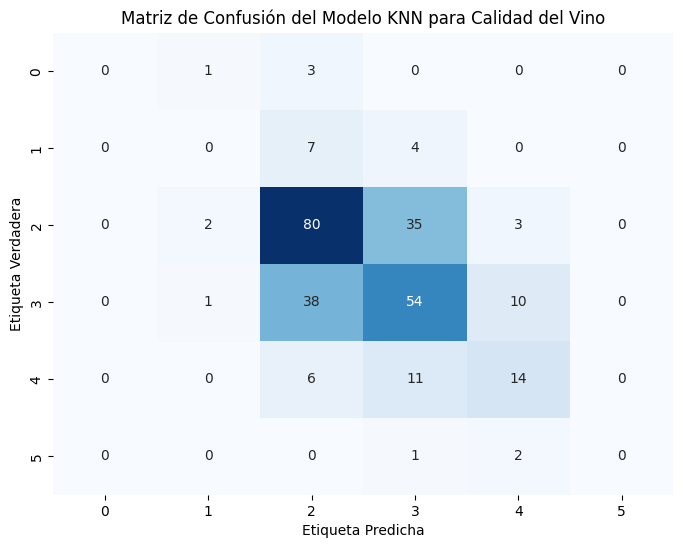

In [52]:
# Matriz de confusión visual
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión del Modelo KNN para Calidad del Vino')
plt.show()

In [53]:
# Guardar modelo y scaler para usar luego en la app
joblib.dump(knn, 'knn_wine_quality_model.joblib')
joblib.dump(scaler, 'scaler_wine_quality.joblib')
print("Modelo y scaler guardados exitosamente.")

Modelo y scaler guardados exitosamente.


# Paso 2: Desarrollar la aplicación web con Streamlit

In [54]:
# Guarda este archivo como app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [55]:
# Cargar modelo y scaler guardados
knn_model = joblib.load('knn_wine_quality_model.joblib')
scaler = joblib.load('scaler_wine_quality.joblib')

st.title("Predicción de Calidad de Vino Tinto")
st.write("""
Esta aplicación predice la **calidad del vino tinto** basado en características fisicoquímicas usando un modelo KNN entrenado.
""")

2025-09-20 08:14:51.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [56]:
# Crear inputs para cada característica basada en el dataset
fixed_acidity = st.number_input('Fixed Acidity', min_value=0.0, max_value=20.0, value=7.4)
volatile_acidity = st.number_input('Volatile Acidity', min_value=0.0, max_value=2.0, value=0.7)
citric_acid = st.number_input('Citric Acid', min_value=0.0, max_value=2.0, value=0.0)
residual_sugar = st.number_input('Residual Sugar', min_value=0.0, max_value=20.0, value=1.9)
chlorides = st.number_input('Chlorides', min_value=0.0, max_value=0.5, value=0.076)
free_sulfur_dioxide = st.number_input('Free Sulfur Dioxide', min_value=0, max_value=100, value=11)
total_sulfur_dioxide = st.number_input('Total Sulfur Dioxide', min_value=0, max_value=300, value=34)
density = st.number_input('Density', min_value=0.9900, max_value=1.0100, value=0.9978)
pH = st.number_input('pH', min_value=2.0, max_value=4.0, value=3.51)
sulphates = st.number_input('Sulphates', min_value=0.0, max_value=2.0, value=0.56)
alcohol = st.number_input('Alcohol', min_value=5.0, max_value=20.0, value=9.4)

if st.button('Predecir Calidad'):
    # Crear arreglo con los datos ingresados
    input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                            chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                            pH, sulphates, alcohol]])
    
    # Escalar los datos con el scaler previamente ajustado
    input_scaled = scaler.transform(input_data)
    
    # Predecir con el modelo KNN
    prediction = knn.predict(input_scaled)
    
    st.success(f'La calidad predicha del vino es: {prediction[0]}')

2025-09-20 08:14:51.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 08:14:51.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar